<title><h1><b>Web Scraping e Análise Exploratória</b></h1></title>

Neste projeto vou realizar:
   1. Extração de dados de uma página web;
   2. Análise exploratória dos dados.

Os dados serão extraídos do portal de vagas Indeed: https://br.indeed.com/

Na Etapa 1, utilizarei a biblioteca Selenium, seu WebDriver Chromium e, a biblioteca Beautiful Soup.

    Selenium - é um conjunto de ferramentas para automação de navegadores web, utilizado principalmente para testes automatizados de software. Aqui, utilizarei para automatizar alguns cliques na página com o intuito de acessar os dados.

    Beautiful Soup - é uma biblioteca para extração de dados de documentos HTML e XML.

Na Etapa 2, realizo análise exploratória dos dados obtidos, que neste momento serão recuperados de um arquivo csv. Nesta análise, além do sumário estatístico e das visualizações de dados, utilizo também o pacote NLTK para quebrar as sentenças de texto em palavras, para então fazer o processamento e análise de textos.
    
    NLTK - Natural Language Toolkit é uma plataforma de ferramentas para trabalhar com dados de linguagem natural e processamento de texto.

## Setup

### Importação dos Pacotes

In [52]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas
from matplotlib import pyplot
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

### Outras Configurações

In [2]:
# Download do Chromium Driver
# https://sites.google.com/a/chromium.org/chromedriver/home

# Salve o Chromium na mesma pasta do projeto

## Etapa 1 - Web Scraping

### Acessar a página e obter o documento HTML

In [3]:
URL = "https://br.indeed.com/jobs?q=ciencia+de+dados&l=brasil"

In [4]:
# Instanciar uma sessão do Chrome WebDriver
driver = webdriver.Chrome("./chromedriver")

In [5]:
# Navegar para Url
driver.get(URL)
driver.implicitly_wait(15)

In [6]:
# Aceitar os cookies da página
aceitar_cookies = driver.find_element_by_id("onetrust-accept-btn-handler")
aceitar_cookies.click()

In [7]:
# Obtendo o documento
jobsearch = driver.find_elements_by_class_name("result")

### Realizando a extração do dados

In [11]:
jobs = pandas.DataFrame(columns = ['title', 'company', 'salary', 'location', 'remote', 'jobdesc'])

for jobcard in jobsearch:
    
    html_doc = jobcard.get_attribute('innerHTML')
    soup = BeautifulSoup(html_doc, 'html.parser')
    
    try: title = soup.find("h2", class_="title").a.text.replace('\n', '')
    except: title = ' '
        
    try: company = soup.find(class_="company").string.replace('\n', ' ').strip()
    except: company = 'não informada'
    
    try: salary = soup.find(class_="salaryText").string.replace('\n', ' ').strip()
    except: salary = ' '
    
    try: location = soup.find(class_="location").string
    except: location = ' '
        
    try: remote = soup.find(class_="remote").string
    except: remote = ' '
    
    # Clica no card para acessar o sumário do job
    jobcard.find_element_by_class_name('summary').click()
    
    jobdesc = driver.find_element_by_id('vjs-desc').text.replace('\n', ' ').strip()
    
    jobs = jobs.append(
        {
            'title': title,
            'company': company,
            'salary': salary,
            'location': location,
            'remote': remote,
            'jobdesc': jobdesc
        },
        ignore_index = True)

,title,company,salary,location,remote,jobdesc
0,BANCO DE TALENTOS l BGC Brasil,BGC Brasil,R$ 1.500 - R$ 2.000 por mês,"Rio de Janeiro, RJ",Home office,https://bit.ly/AlmaBGC para realizar sua inscr...
1,Estágio Desenvolvedor de Software Full Stack,Empresa confidencial,R$ 1.000 por mês,Santa Catarina,Home office,Nível: Estagiário Área: Tecnologia da Informaç...
2,Assistente De Integração De Dados – Escritório...,Buscar Vagas - BR,R$ 2.000 por mês,"Novo Hamburgo, RS",,Atribuições: Escritório de Contabilidade local...
3,Gerente de Relacionamento,Sicoob Confiança,,"Marechal Cândido Rondon, PR",,Descrição: Administrar e atender a carteira de...
4,Assistente de Departamento Pessoal,,R$ 1.500 por mês,"Salvador, BA",Home office,A Agilize é a única contabilidade online com a...
5,Assistente de Cadastro,,,"Maringá, PR",Home office,Descrição: Realizar o cadastro do cooperado p...
6,Assistente De Dados – Recife – PE,Divulga Vagas,,"Recife, PE",,"Atribuições : Análise de preços, produtos e co..."
7,Auxiliar de Contabilidade,Pessin Gestão e Desenvolvimento Humano,R$ 1.500 por mês,"Eunápolis, BA",,DESCRIÇÃO DA VAGA Realização de lançamentos co...
8,Analista de CRM,GF Gestão de Pessoas,R$ 7.000 - R$ 8.000 por mês,Remoto,,O QUE VOCÊ PRECISA TER: - Vivência em estrutur...
9,ANALISTA FINANCEIRO,Divulga Vagas,R$ 2.500 - R$ 3.500 por mês,"São José dos Campos, SP",,"Desejável possuir superior em Administração, E..."


In [ ]:
# Uma pré visualização
jobs.head()

In [12]:
# Vamos salvar os dados obtidos em um arquivo CSV
jobs.to_csv("./jobs.csv", encoding="utf-8", index=False)

## Etapa 2 - Análise Exploratória

A partir deste ponto vou recuperar os dados do arquivo csv que criei, e não mais acessar a página para buscar estes dados.

In [14]:
# Importar os dados do arquivo CSV
mass = pandas.read_csv("./jobs.csv", encoding="utf-8").fillna('')

In [17]:
# Uma pré visualização
mass.head()

,title,company,salary,location,remote,jobdesc
0,BANCO DE TALENTOS l BGC Brasil,BGC Brasil,R$ 1.500 - R$ 2.000 por mês,"Rio de Janeiro, RJ",Home office,https://bit.ly/AlmaBGC para realizar sua inscr...
1,Estágio Desenvolvedor de Software Full Stack,Empresa confidencial,R$ 1.000 por mês,Santa Catarina,Home office,Nível: Estagiário Área: Tecnologia da Informaç...
2,Assistente De Integração De Dados – Escritório...,Buscar Vagas - BR,R$ 2.000 por mês,"Novo Hamburgo, RS",,Atribuições: Escritório de Contabilidade local...
3,Gerente de Relacionamento,Sicoob Confiança,,"Marechal Cândido Rondon, PR",,Descrição: Administrar e atender a carteira de...
4,Assistente de Departamento Pessoal,,R$ 1.500 por mês,"Salvador, BA",Home office,A Agilize é a única contabilidade online com a...


In [20]:
# Aqui, faço a contagem de quais empresas possuem mais vagas
company_jobs = mass.groupby('company').count()['title'].sort_values(ascending=False)
company_jobs

company
                                          4
Divulga Vagas                             4
Buscar Vagas - BR                         2
BGC Brasil                                1
Empresa confidencial                      1
GF Gestão de Pessoas                      1
Pessin Gestão e Desenvolvimento Humano    1
Sicoob Confiança                          1
Name: title, dtype: int64

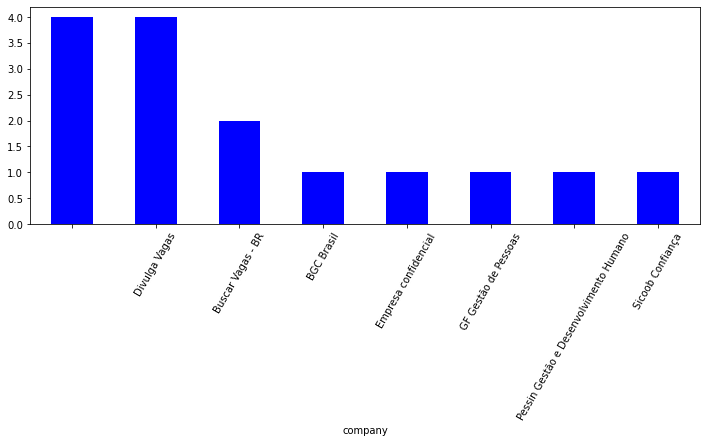

In [39]:
company_jobs.plot(kind='bar', figsize=(12,4), rot=60, color="blue")
pyplot.show()

In [35]:
# Aqui, faço a contagem de quais localidades possuem mais vagas
location_jobs = mass.groupby('location').count()['title'].sort_values(ascending=False)
location_jobs

location
Recife, PE                     4
Brasília, DF                   1
Cascavel, PR                   1
Eunápolis, BA                  1
Marechal Cândido Rondon, PR    1
Maringá, PR                    1
Novo Hamburgo, RS              1
Remoto                         1
Rio de Janeiro, RJ             1
Salvador, BA                   1
Santa Catarina                 1
São José dos Campos, SP        1
Name: title, dtype: int64

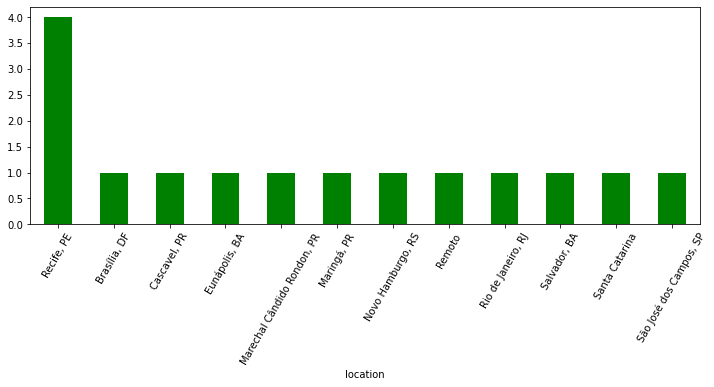

In [43]:
location_jobs.plot(kind='bar', figsize=(12,4), rot=60, color="green")
pyplot.show()

Agora vou analisar os dados de texto, aplicando um processamento de linguagem natural

In [44]:
# Função de limpeza dos dados
def limpa_dados(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words_pt]
    desc = [word for word in desc if word not in stop_words_en]
    return desc

In [47]:
# Vamos definir a lista de stopwords em português
stop_words_pt = stopwords.words('portuguese')

In [48]:
# Vamos definir a lista de stopwords em inglês
stop_words_en = stopwords.words('english')

In [49]:
# Aplicamos a função de limpeza a coluna de descrição da vaga
desc_jobs = mass["jobdesc"].apply(limpa_dados)

In [50]:
# Visualiza os dados
desc_jobs.head()

0    [https, realizar, inscrição, fala, universitár...
1    [nível, estagiário, área, tecnologia, informaç...
2    [atribuições, escritório, contabilidade, local...
3    [descrição, administrar, atender, carteira, co...
4    [agilize, única, contabilidade, online, atuaçã...
Name: jobdesc, dtype: object

In [53]:
# Vamos sumarizar as descrições das vagas
desc_itens = desc_jobs.apply(Counter).sum().items()

In [54]:
# Ordenamos o resultado
desc_itens = sorted(desc_itens, key = lambda kv: kv[1], reverse = True)

In [56]:
# Criamos uma série
desc_itens_serie = pandas.Series({k: v for k, v in desc_itens})

In [57]:
# Visualizamos os dados, com a contagem de palavras mais frequentes nas descrições das vagas
desc_itens_serie.head(15)

dados              36
conhecimento       25
computação         21
ter                19
experiência        17
sistemas           16
análise            16
superior           15
desenvolvimento    15
áreas              15
ciências           15
vaga               14
informações        13
desejável          13
requisitos         12
dtype: int64

In [58]:
# Vamos criar uma lista de skills e pesquisar como eles aparecem nas descrições das vagas
# Usamoas as palavras em minúsculo pois ao limpar os dados convertemos tudo para minúsculo
skills = ["python", "statistics", "analytics", "business", "projects", "develop"]

In [59]:
# Filtramos a série com os skills
filtro_skills = desc_itens_serie.filter(items = skills)

<AxesSubplot:>

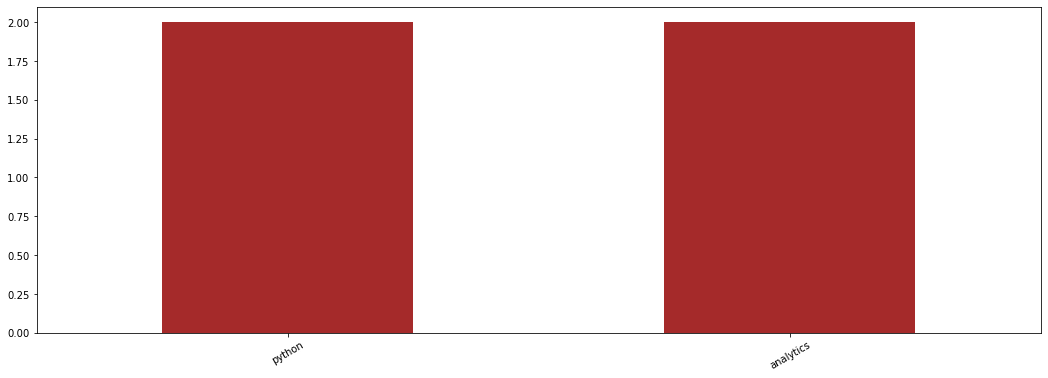

In [60]:
# Criamos o plot
filtro_skills.plot(kind = 'bar', figsize = (18,6), color = "brown", rot = 30)